### Exploratory and Diagnostic Data Analysis of treadmil_users data 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
import pandas.util.testing as tm

In [6]:
df = pd.read_csv('treadmil-users.csv')

In [7]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [8]:
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Mean Age of Users

In [10]:
df['Age'].mean()

28.788888888888888

### No of Males and Females

In [11]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

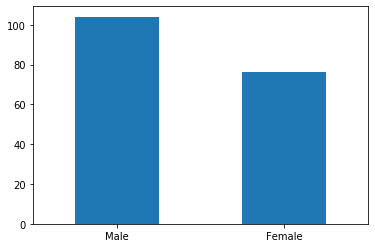

In [12]:
df['Gender'].value_counts().plot.bar(rot=0)

### Count of Single and Partnered

In [13]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

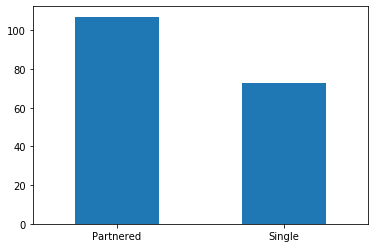

In [14]:
df['MaritalStatus'].value_counts().plot.bar(rot=0)

### Count of Unique Products

In [15]:
df['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

### Bar plot of Users Age

Text(0, 0.5, 'Frequency-->')

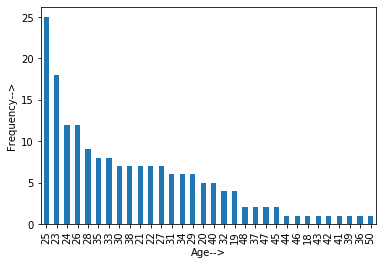

In [17]:
df['Age'].value_counts().plot.bar()
plt.xlabel('Age-->')
plt.ylabel('Frequency-->')

### Gender wise Fitness level count

In [13]:
pd.crosstab(df['Gender'],df['Fitness'])

Fitness,1,2,3,4,5
Gender,,,,,
Female,1,16,45,8,6
Male,1,10,52,16,25


### Gender wise mean Fitness value

In [14]:
df.groupby('Gender')['Fitness'].mean()

Gender
Female    3.026316
Male      3.519231
Name: Fitness, dtype: float64

### Gender wise maximum miles covered 

In [15]:
df.groupby('Gender')['Miles'].max()

Gender
Female    280
Male      360
Name: Miles, dtype: int64

Overall stats of DataFrame
  1. Mean age of Users is approximately 29 and their is a significant amount of deviation in users age.
  2. Average Usage of Product by Users is around 3.45 Hours/day
  3. Average Fitness of Users is around 3.3
  4. Mean Income of users is 53719.57
  5. Max distance covered in miles is 360.

In [16]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### No null values present

In [17]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [18]:
len(df[(df['Gender']=='Male') & (df['Fitness']==3)])

52

In [19]:
df[(df['Gender']=='Male')  & (df['MaritalStatus']=='Single')]['Usage'].mean()

3.697674418604651

### Gender wise mean usage value

In [19]:
df.groupby('Age')['Usage'].mean()

Age
18    3.000000
19    3.000000
20    3.000000
21    3.142857
22    3.428571
23    3.388889
24    3.750000
25    3.320000
26    3.583333
27    3.571429
28    4.000000
29    4.000000
30    4.285714
31    2.833333
32    3.500000
33    3.250000
34    3.500000
35    3.250000
36    4.000000
37    2.500000
38    3.142857
39    4.000000
40    3.600000
41    4.000000
42    5.000000
43    3.000000
44    3.000000
45    3.500000
46    3.000000
47    4.000000
48    3.000000
50    3.000000
Name: Usage, dtype: float64

In [20]:
df[df['Miles']==df['Miles'].max()]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
173,TM798,35,Male,16,Partnered,4,5,92131,360


### Count of Users based on Product they use

In [23]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

### Average Fitness of Users is between 3.0 to 3.4

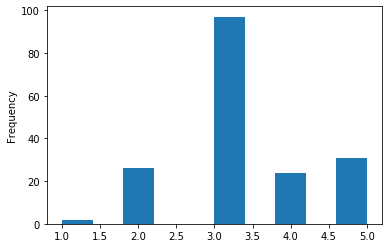

In [24]:
df['Fitness'].plot.hist()

### Count of Users based on their Fitness level

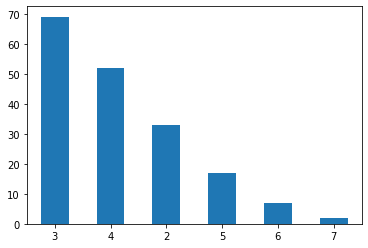

In [21]:
df['Usage'].value_counts().plot.bar(rot=0)

### Unique values in each column

In [26]:
df.apply(lambda x : x.unique(),axis=0)

Product                                      [TM195, TM498, TM798]
Age              [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2...
Gender                                              [Male, Female]
Education                         [14, 15, 12, 13, 16, 18, 20, 21]
MaritalStatus                                  [Single, Partnered]
Usage                                           [3, 2, 4, 5, 6, 7]
Fitness                                            [4, 3, 2, 1, 5]
Income           [29562, 31836, 30699, 32973, 35247, 37521, 363...
Miles            [112, 75, 66, 85, 47, 141, 103, 94, 113, 38, 1...
dtype: object

In [27]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [28]:
cols = df.columns

In [29]:
for i in cols:
    print(df[i].unique())

['TM195' 'TM498' 'TM798']
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
['Male' 'Female']
[14 15 12 13 16 18 20 21]
['Single' 'Partnered']
[3 2 4 5 6 7]
[4 3 2 1 5]
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
[112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


### Product wise description of Users details

In [30]:
df.groupby('Product').describe().T

Product                 TM195         TM498          TM798
Age       count     80.000000     60.000000      40.000000
          mean      28.550000     28.900000      29.100000
          std        7.221452      6.645248       6.971738
          min       18.000000     19.000000      22.000000
          25%       23.000000     24.000000      24.750000
          50%       26.000000     26.000000      27.000000
          75%       33.000000     33.250000      30.250000
          max       50.000000     48.000000      48.000000
Education count     80.000000     60.000000      40.000000
          mean      15.037500     15.116667      17.325000
          std        1.216383      1.222552       1.639066
          min       12.000000     12.000000      14.000000
          25%       14.000000     14.000000      16.000000
          50%       16.000000     16.000000      18.000000
          75%       16.000000     16.000000      18.000000
          max       18.000000     18.000000      21.000000
Usage     count     80.000000     60.000000      40.000000
          mean       3.087500      3.066667       4.775000
          std        0.782624      0.799717       0.946993
          min        2.000000      2.000000       3.000000
          25%        3.000000      3.000000       4.000000
          50%        3.000000      3.000000       5.000000
          75%        4.000000      3.250000       5.000000
          max        5.000000      5.000000       7.000000
Fitness   count     80.000000     60.000000      40.000000
          mean       2.962500      2.900000       4.625000
          std        0.664540      0.629770       0.667467
          min        1.000000      1.000000       3.000000
          25%        3.000000      3.000000       4.000000
          50%        3.000000      3.000000       5.000000
          75%        3.000000      3.000000       5.000000
          max        5.000000      4.000000       5.000000
Income    count     80.000000     60.000000      40.000000
          mean   46418.025000  48973.650000   75441.575000
          std     9075.783190   8653.989388   18505.836720
          min    29562.000000  31836.000000   48556.000000
          25%    38658.000000  44911.500000   58204.750000
          50%    46617.000000  49459.500000   76568.500000
          75%    53439.000000  53439.000000   90886.000000
          max    68220.000000  67083.000000  104581.000000
Miles     count     80.000000     60.000000      40.000000
          mean      82.787500     87.933333     166.900000
          std       28.874102     33.263135      60.066544
          min       38.000000     21.000000      80.000000
          25%       66.000000     64.000000     120.000000
          50%       85.000000     85.000000     160.000000
          75%       94.000000    106.000000     200.000000
          max      188.000000    212.000000     360.000000

In [34]:
cols

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

### Barplot, Boxplot and violinplot of Continous variables

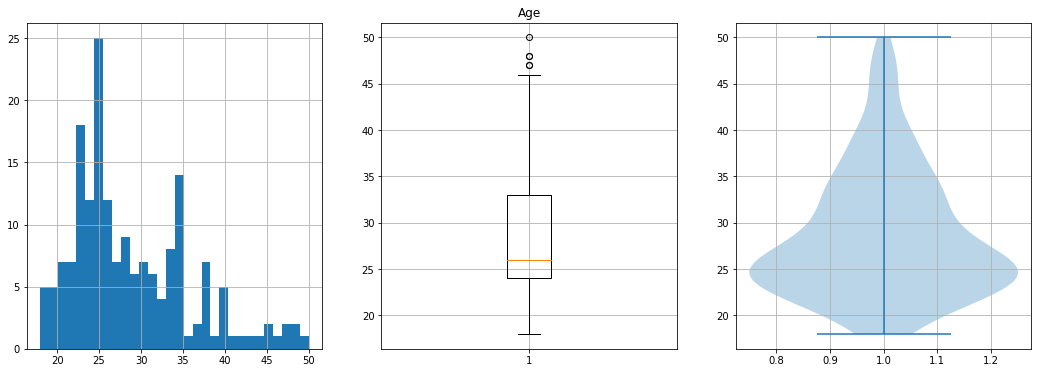

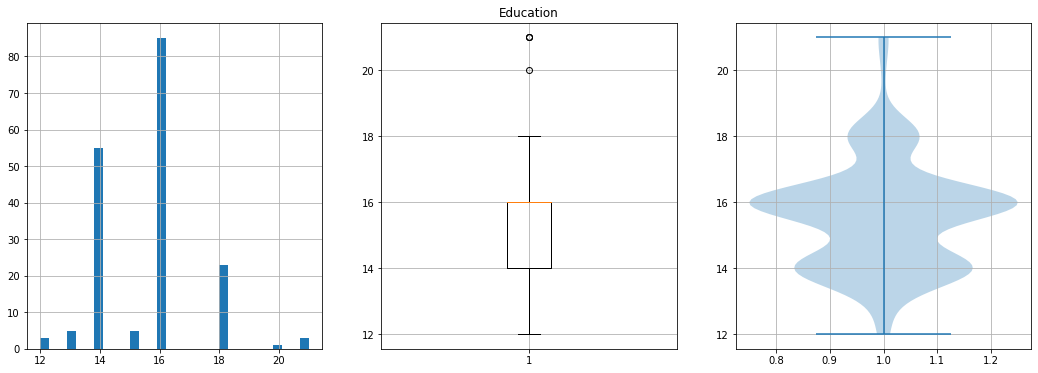

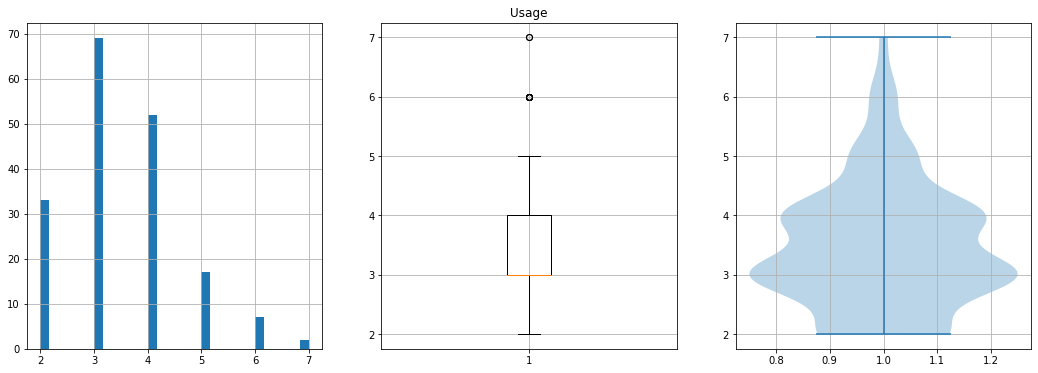

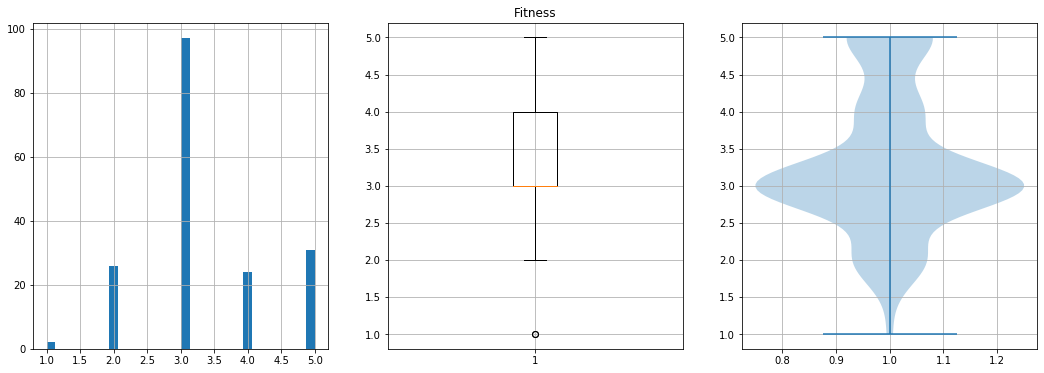

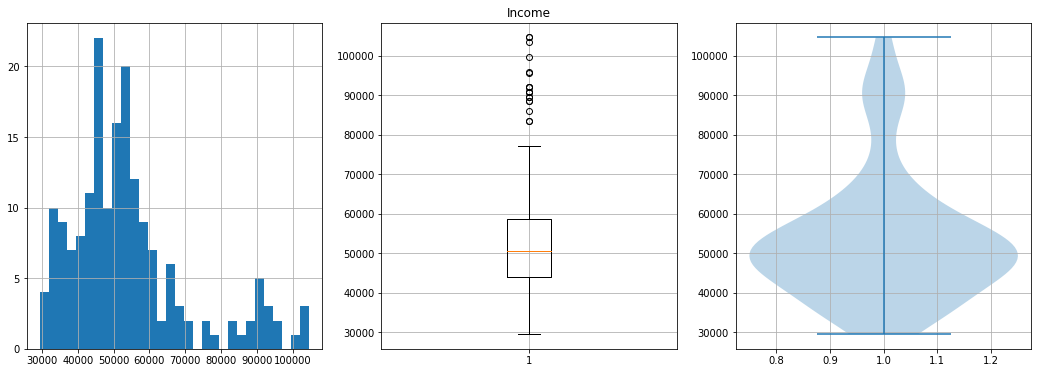

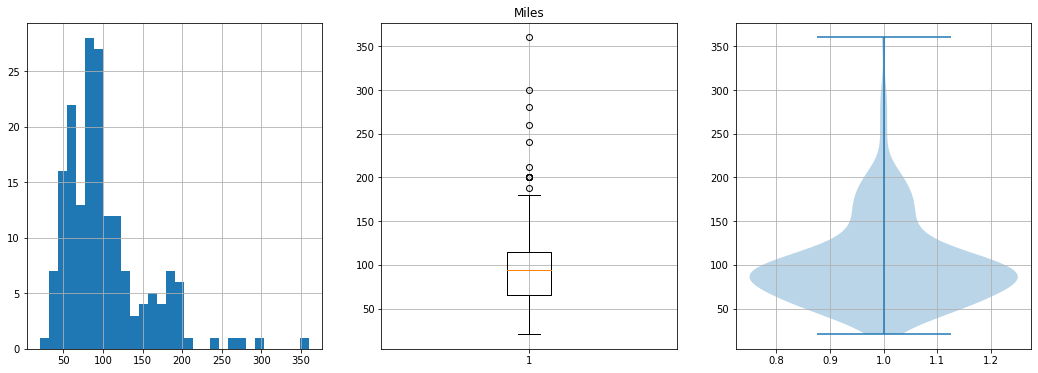

In [37]:
for i in ['Age','Education','Usage','Fitness','Income','Miles']:
    plt.figure(figsize=(18,6))
    
    plt.subplot(1,3,1)
    plt.hist(df[i],bins=30)
    plt.grid()
    
    
    plt.subplot(1,3,2)
    plt.boxplot(df[i])
    plt.grid()
    plt.title(i)
    
    plt.subplot(1,3,3)
    plt.violinplot(df[i])
    plt.grid()

### PieChart of Categorical Variables

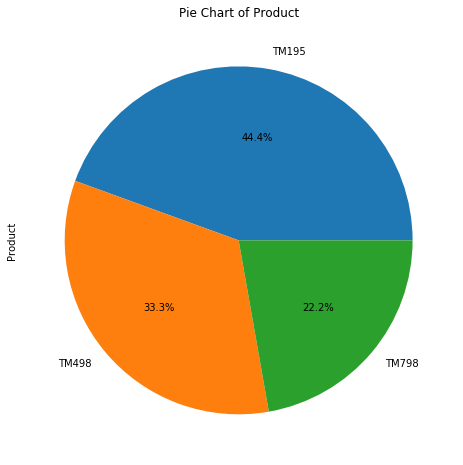

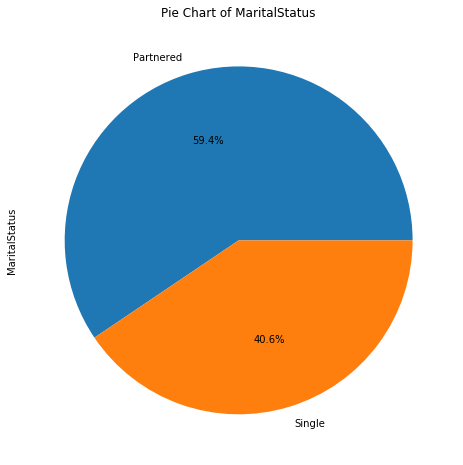

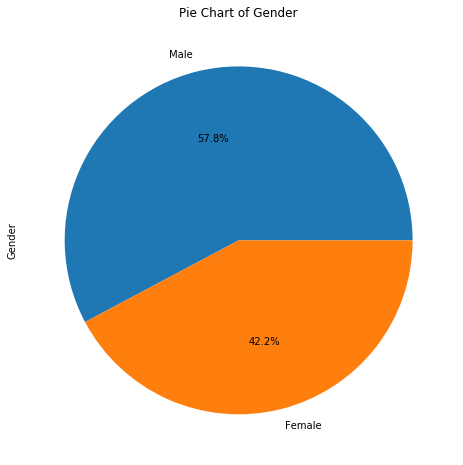

In [45]:
for i in ['Product','MaritalStatus','Gender']:
    plt.figure()  
    df[i].value_counts().plot.pie(autopct='%.1f%%',figsize=(8,8))
    plt.title('Pie Chart of {}'.format(i))
    #plt.show()

### Scatter plot between 'Age' and 'Miles'

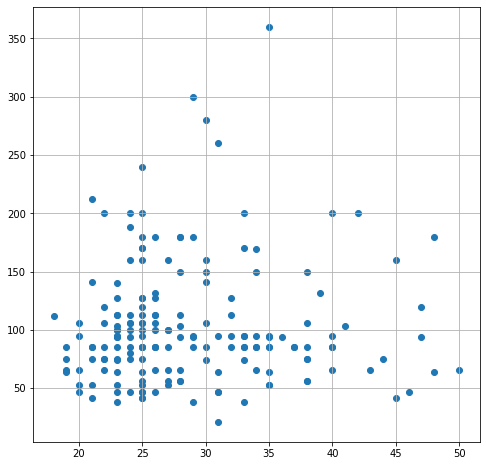

In [47]:
plt.figure(figsize=(8,8))
plt.scatter(df['Age'],df['Miles'])
plt.grid()

### In Above Scatter plot we can see that:
    1. Data is Distributed and not linear 
    2. Variety of Users with different preferences

### Product wise Gender Count

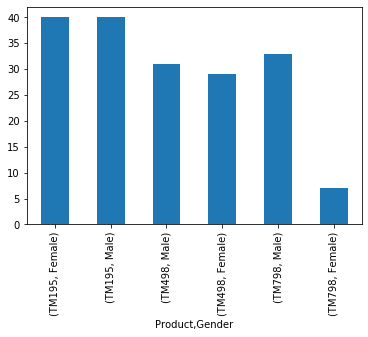

In [52]:
df.groupby('Product')['Gender'].value_counts().plot.bar()

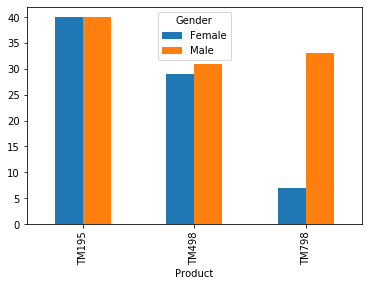

In [51]:
pd.crosstab(df['Product'],df['Gender']).plot.bar()

### Product wise MaritalStatus Count

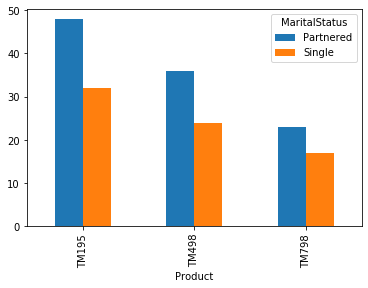

In [53]:
pd.crosstab(df['Product'],df['MaritalStatus']).plot.bar()

### Conclusion:
    1. Around 44% of Users use Product TM195
    2. 33.3% of Users use Product TM498
    3. And Only 22.2% Users use Product TM798
    4. People with Average Income around 75441 Rs are more likely to buy product TM798
    5. People who use Product TM798 have better Average Fitness level compare to product TM195 and TM498
    6. Married Couples are more likely to use these products
    7. The Users with Average Income between 45000 to 50000 buys either product TM195 or TM498
    8. The Avg distance covered by the users who uses product TM798 is 167 which is just double than the rest of the two products.
    